# Fake News Detection

# Importing Libraries

In [31]:
import numpy as np

import pandas as pd

import matplotlib.pyplot as plt

import seaborn as sns

import itertools

from sklearn.model_selection import train_test_split

from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.linear_model import PassiveAggressiveClassifier

from sklearn.metrics import accuracy_score, confusion_matrix

Numpy and Pandas used here for data manipulation and itertools module is used here to handle iterators.

Itertools: Python itertools module is a collection of tools for handling iterators. Simply put, iterators are data types that can be used in a for loop. The most common iterator in Python is the list.

In [11]:
#reading data
df=pd.read_csv('/content/news.csv')
df.head()

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


**Note**: As you can see in the above output we have news title text in news and label of news (i.e. fake 0 or real 1).

In [12]:
#Defining our features and target
X=df['text']
Y=df['label']

In [13]:
X.head()

0    Daniel Greenfield, a Shillman Journalism Fello...
1    Google Pinterest Digg Linkedin Reddit Stumbleu...
2    U.S. Secretary of State John F. Kerry said Mon...
3    — Kaydee King (@KaydeeKing) November 9, 2016 T...
4    It's primary day in New York and front-runners...
Name: text, dtype: object

In [14]:
Y.head()

0    FAKE
1    FAKE
2    REAL
3    FAKE
4    REAL
Name: label, dtype: object

# Spliting the data into train and test set

In [15]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.3,random_state=7)

As we know, we have to know about a text / corpus whether it is fake or real.that means our target is label (fake or real) which we will know from the features i.e. text. After that we split the data into train and test data.Training data  is used to train the model (learning of model), whereas from testing data we see how much the model has learned.

# preprocessing of data (tokenize and creating matrix)

In [16]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer=TfidfVectorizer(stop_words='english', max_df=0.7)

In [17]:
#preprocessing of train data

tfidf_train=tfidf_vectorizer.fit_transform(x_train)



In [18]:
#preprocessing of test data  

tfidf_test=tfidf_vectorizer.transform(x_test)

The TfidfVectorizer tokenize the data, then converts the data into a matrix form and decide the weightage of the words.(means preprocessing of data).Because the machine cannot understand the documents (doc type), it is necessary to preprocess the data(convert into matrix).


#Training our model

In [19]:
#classifier or algorithm to learn the model

passive=PassiveAggressiveClassifier(max_iter=50)

passive.fit(tfidf_train,y_train)






PassiveAggressiveClassifier(C=1.0, average=False, class_weight=None,
                            early_stopping=False, fit_intercept=True,
                            loss='hinge', max_iter=50, n_iter_no_change=5,
                            n_jobs=None, random_state=None, shuffle=True,
                            tol=0.001, validation_fraction=0.1, verbose=0,
                            warm_start=False)

In [21]:
y_pred=passive.predict(tfidf_test)


#Accuracy of model

In [22]:
#accuracy of the model

score=accuracy_score(y_test,y_pred)

print(score)

0.9253024723829564


#Confusion Matrix

array([[904,  70],
       [ 72, 855]])

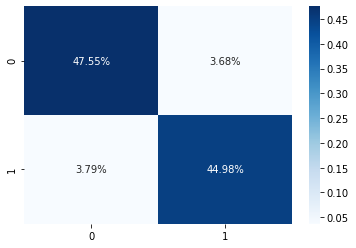

In [32]:
#confusion matrix or kind of error calculation 
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
sns.heatmap(cm/np.sum(cm), annot=True, fmt='.2%', cmap='Blues')
cm

**Here we used passiveagressive classifier (or algorithm, it is a kind of supervised learning algorithm ) to train our model. After training of the model we tested our model.Accuracy of our model is 0.92 (ie 92 %) and from the confusion matrix we can clearly see that we have total 586 false news (0) , 586 real news (1) and (52+43) wrong prediction by model.**
